In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


In [2]:
true = pd.read_csv('True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake = pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true['label'] = 1

In [5]:
fake['label'] = 0

In [6]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
news =pd.concat([fake, true], axis = 0)

In [9]:
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
news.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [11]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [12]:
true.shape

(21417, 5)

In [13]:
fake.shape

(23481, 5)

In [14]:
23481+21417

44898

In [15]:
news.shape

(44898, 5)

In [16]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [17]:
news = news.drop(['title', 'subject', 'date'], axis = 1)

In [18]:
news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [19]:
news = news.sample(frac = 1) # reshuffling

In [20]:
news.head()

,text,label
6830,Fox News raging pile of upper one percent gar...,0
9053,WASHINGTON (Reuters) - President Barack Obama’...,1
1264,WASHINGTON (Reuters) - U.S. President Donald T...,1
7699,WASHINGTON (Reuters) - U.S. policy is to achie...,1
4573,Several top Republicans have yet to endorse Do...,0


In [21]:
news.reset_index(inplace = True)

In [22]:
news.head()

,index,text,label
0,6830,Fox News raging pile of upper one percent gar...,0
1,9053,WASHINGTON (Reuters) - President Barack Obama’...,1
2,1264,WASHINGTON (Reuters) - U.S. President Donald T...,1
3,7699,WASHINGTON (Reuters) - U.S. policy is to achie...,1
4,4573,Several top Republicans have yet to endorse Do...,0


In [23]:
news.drop(['index'], axis = 1, inplace = True)

In [24]:
def wordopt(text):
    # convert into lowercase
    text = text.lower()  

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+','',text)

    # Remove HTML tags
    text = re.sub(r'<.*?>','',text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove digits
    text = re.sub(r'\d', ' ', text)

    # Remove newline characters
    text  = re.sub(r'\n', ' ', text)

    return text

In [25]:
news['text'] = news['text'].apply(wordopt)

In [26]:
news['text']

0        fox news  raging pile of upper one percent gar...
1        washington reuters  president barack obamas no...
2        washington reuters  us president donald trump ...
3        washington reuters  us policy is to achieve a ...
4        several top republicans have yet to endorse do...
                               ...                        
44893      st century wire says last april the un gener...
44894    merkellegacy pictwittercomwbh cjj iw  james wo...
44895    beijing reuters  china s foreign ministry said...
44896                         awkward i am a progressive  
44897    berne reuters  neutral switzerland is prepared...
Name: text, Length: 44898, dtype: object

In [27]:
x = news['text']
y = news['label']

In [28]:
x

0        fox news  raging pile of upper one percent gar...
1        washington reuters  president barack obamas no...
2        washington reuters  us president donald trump ...
3        washington reuters  us policy is to achieve a ...
4        several top republicans have yet to endorse do...
                               ...                        
44893      st century wire says last april the un gener...
44894    merkellegacy pictwittercomwbh cjj iw  james wo...
44895    beijing reuters  china s foreign ministry said...
44896                         awkward i am a progressive  
44897    berne reuters  neutral switzerland is prepared...
Name: text, Length: 44898, dtype: object

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3)

In [30]:
x_train.shape

(31428,)

In [31]:
x_test.shape

(13470,)

In [32]:
vectorization = TfidfVectorizer()

In [33]:
xv_train = vectorization.fit_transform(x_train)

In [34]:
xv_test = vectorization.transform(x_test)

In [35]:
xv_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6473759 stored elements and shape (31428, 175822)>

In [36]:
xv_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2713408 stored elements and shape (13470, 175822)>

In [37]:
import joblib

1. joblib.dump - save
2. joblib.load

### logistic regression

In [38]:
LR = LogisticRegression()

In [39]:
LR.fit(xv_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [40]:
joblib.dump(LR, 'fake_newsmodel.joblib')

['fake_newsmodel.joblib']

In [41]:
newsmodel = joblib.load('fake_newsmodel.joblib')

In [42]:
pred_lr = newsmodel.predict(xv_test)

In [43]:
newsmodel.score(xv_test, y_test)

0.9880475129918337

In [44]:
sample_text = ['JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is trying to promote its palm oil products amid threats of a cut in consumption by European Union countries. Indonesia is also trying to modernize its ageing air force after a string of military aviation accidents. Indonesia, which had a $411 million trade surplus with Russia in 2016, wants to expand bilateral cooperation in tourism, education, energy, technology and aviation among others. ']

# Step 1: Convert text to vector
sample_text_vector = vectorization.transform(sample_text)

# Step 2: Predict
print(newsmodel.predict(sample_text_vector))


[1]


In [45]:
y_LR_prediction = newsmodel.predict(xv_test)
y_LR_prediction

array([0, 0, 1, ..., 1, 1, 0], shape=(13470,))

In [46]:
cm = confusion_matrix(y_test, y_LR_prediction)
print(cm)

[[6977  101]
 [  60 6332]]


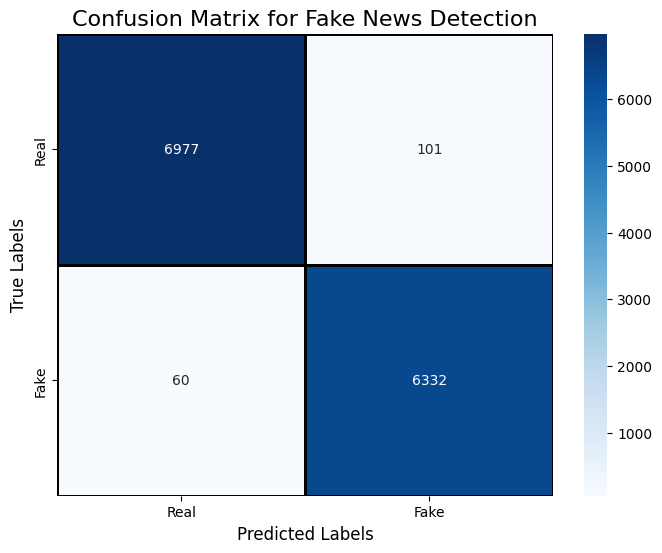

In [47]:
# Generate confusion matrix
class_names = ['Real', 'Fake']  # Change as per your class labels

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', linewidths=1, linecolor='black', 
            xticklabels=class_names, yticklabels=class_names, cbar=True)

plt.title('Confusion Matrix for Fake News Detection', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [48]:
precision = precision_score(y_test, y_LR_prediction)
print(f'precision= {precision:.2%}')

precision= 98.43%


In [49]:
print(classification_report(y_test, y_LR_prediction))
print(confusion_matrix(y_test, y_LR_prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7078
           1       0.98      0.99      0.99      6392

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

[[6977  101]
 [  60 6332]]


In [50]:
def output_label(n):
    if n== 0:
        return "It is a Fake News."
    elif n== 1:
        return "It is a Genuine News."

In [51]:
def manual_testing(news):
    testing_news = {"text": [news]}  # Create DataFrame from input text
    new_def_test = pd.DataFrame(testing_news)
    
    # Text preprocessing (assuming you have a wordopt() function for cleaning)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    
    # Vectorization (Assuming 'vectorization' is your trained TfidfVectorizer)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    
    # Prediction using Logistic Regression
    pred_lr = newsmodel.predict(new_xv_test)

    return "\n\nLR Prediction: {}".format(output_label(pred_lr[0]))


In [52]:
news_artical = input()

  BUENOS AIRES (Reuters) - Argentina s main labor unions took to the streets of the capital on Tuesday demanding more jobs and protesting center-right President Mauricio Macri s economic policies.  Tens of thousands of workers gathered in the historic Plaza de Mayo criticizing Macri, who is trying to lower labor costs to attract investment and jump-start an economy that emerged from recession in the second half of last year.  If some retrograde (in the government) thinks that lowering wages, precarious living conditions and destroying trade unions is going to line up investments... we say that is very wrong,  said Juan Carlos Schmid, a leader of Argentina s largest umbrella union, the CGT. Standing on a podium at the protest, he said the CGT would meet in late September to discuss a potential strike.  Macri told Reuters in an interview this month his government was negotiating labor agreements sector by sector rather than trying to pass a comprehensive labor reform like the one approve

In [53]:
manual_testing(news_artical)

'\n\nLR Prediction: It is a Genuine News.'